In [ ]:
#Regression analysis is a form of predictive modelling technique which investigates the relationship between a dependent variable and independent variable 
#Major uses for regression analysis: Determining strength of predictors(independent variable), Forecasting an effect and Trend forecasting
#Computational compllexity of linear regression is usually O(n^2) or O(n)
#Equation y = mx + c, y is the depedent variable, m is the slope of line, x is the independent variable , c is sthe y intercept
#Equation for negative relation y = -mx + c
#One of the use case of regression is to predict stock and crypto prices



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
data = pd.read_csv('Human_Brain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
data.tail()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


In [4]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [5]:
mean_x = np.mean(X)
mean_y = np.mean(Y)
m = len(X)

numer = 0
denom = 0
#Calculating value of b1(m) and b0(c)
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i]- mean_x) ** 2

b1 = numer/denom
b0 = mean_y - (b1 * mean_x)
print(b1, b0)

0.26342933948939945 325.57342104944223


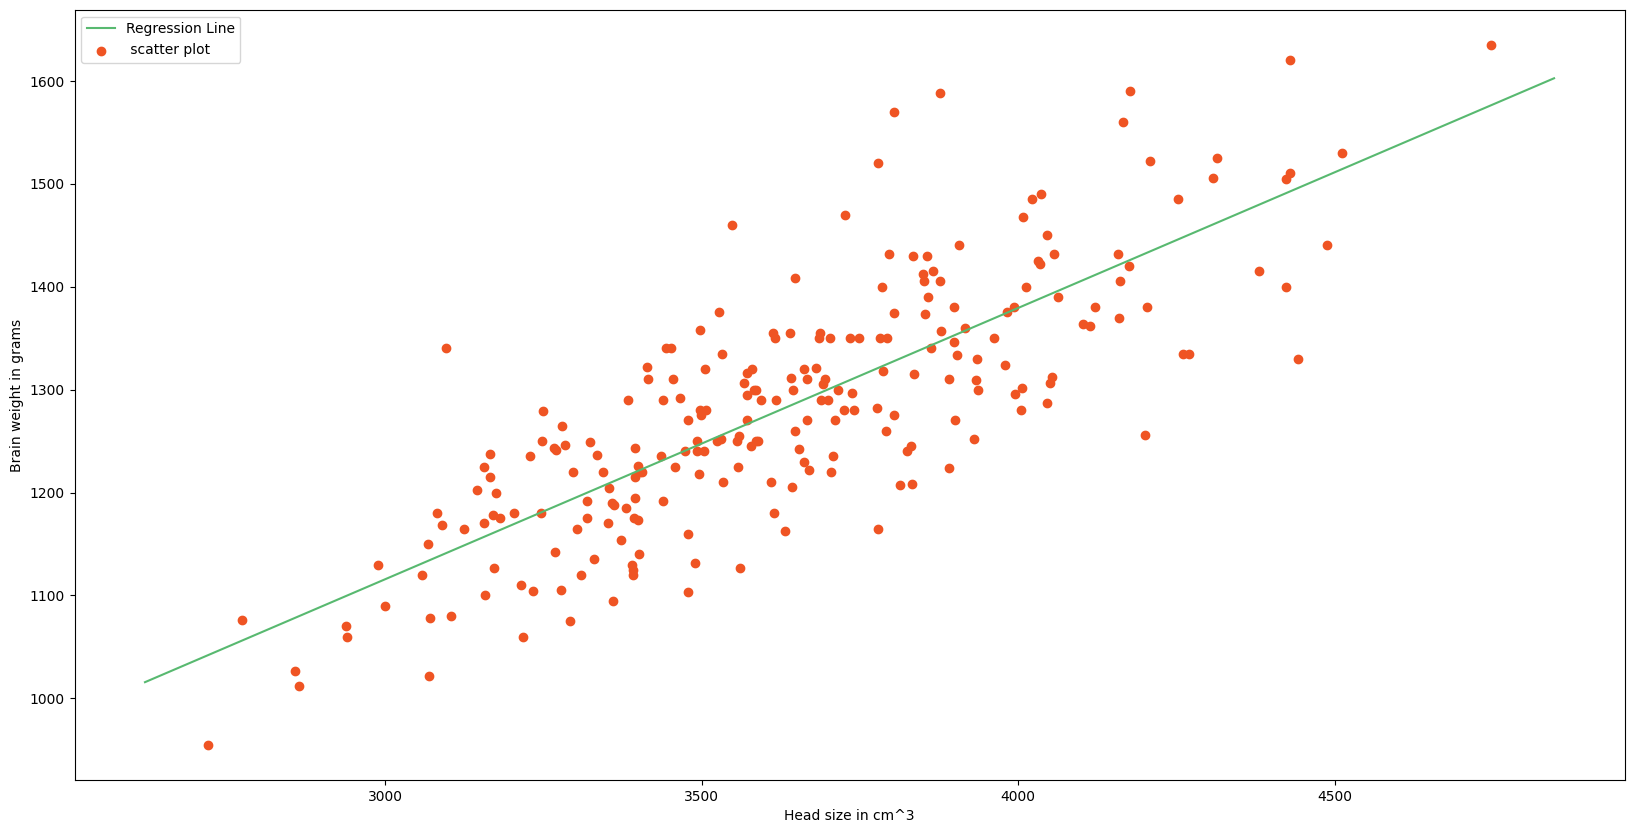

In [6]:
#Plotting values and Regression line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

#Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

#Plotting line 
plt.plot(x,y,color='#58b970',label='Regression Line')

#Plotting Scatter plot
plt.scatter(X, Y, c = '#ef5423',label =' scatter plot')

plt.xlabel('Head size in cm^3')
plt.ylabel('Brain weight in grams')
plt.legend()
plt.show()

In [7]:
#Finding R squared 
ss_t = 0  #total sum of square
ss_r = 0  #total sum of square of residuals
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_r += (y_pred - mean_y) ** 2
    ss_t += (Y[i] - mean_y) **2
r2 = ss_r/ss_t
print(r2)
print(round(r2, 2)) 

0.6393117199570001
0.64


In [1]:
#Using scikitlearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

#Cannot use Rank 1 matrix in scikit learn
data = pd.read_csv('Human_Brain.csv')
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

m = len(X)
X = X.reshape((m,1))

#Creating model
reg = LinearRegression()

#Fiting the training data
reg = reg.fit(X, Y)

#Y prediction
Y_pred = reg.predict(X)

#Calculating r2 score
r2_score = reg.score(X,Y)
print(r2_score)


0.639311719957
